In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings
sns.set()
warnings.filterwarnings("ignore")

In [34]:
data = pd.read_csv("winequality_red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [37]:
data.shape

(1599, 12)

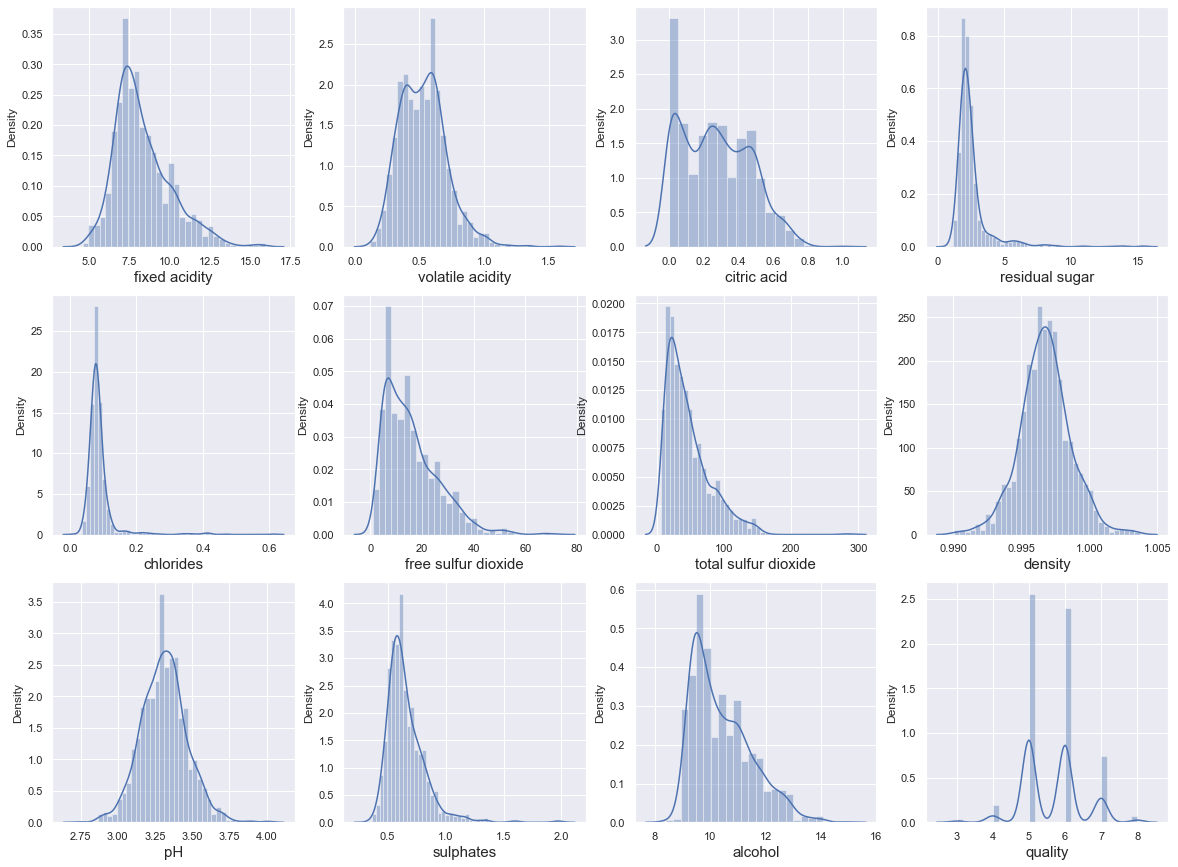

In [38]:
# Data distribution
plt.figure(figsize=(20,15))
n = 1

for col in data:
    if n <= 12:
        ax = plt.subplot(3, 4, n)
        sns.distplot(data[col])
        plt.xlabel(col, fontsize=15)
    n += 1
plt.show()

<AxesSubplot:>

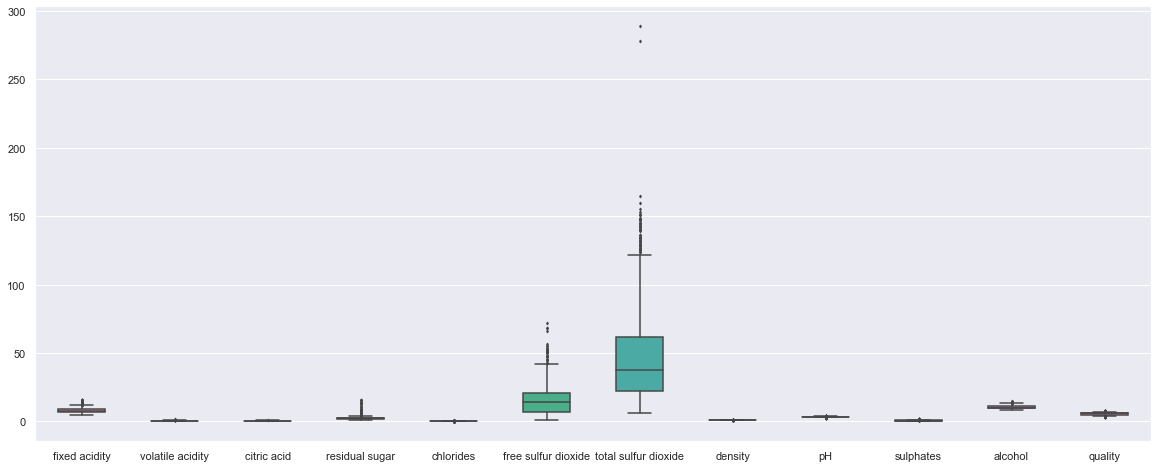

In [39]:
# outlier detection
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=data, width=0.5, fliersize=2, ax=ax)

<AxesSubplot:>

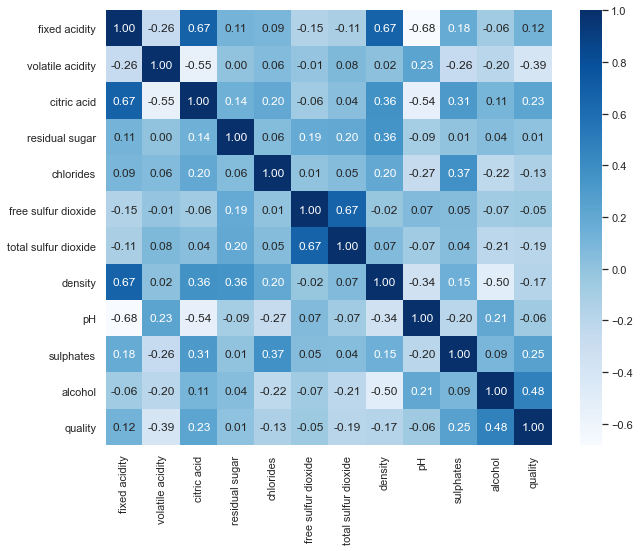

In [40]:
plt.subplots(figsize=(10,8))
corrmat = data.corr()
sns.heatmap(corrmat, annot=True, cmap="Blues", fmt='.2f')

In [42]:
data['q2'] = pd.cut(data['quality'],[0,5,10],labels=[0,1])

In [45]:
data['q2'].value_counts()

1    855
0    744
Name: q2, dtype: int64

In [46]:
X = data.drop(columns=['q2', 'quality'])
y = data.q2

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Multicollinearity

vif = pd.DataFrame()
vari = X_scaled
vif['VIF'] = [variance_inflation_factor(vari, i) for i in range(vari.shape[1])]
vif['Features'] = X.columns
vif

,VIF,Features
0,7.767512,fixed acidity
1,1.789390,volatile acidity
2,3.128022,citric acid
3,1.702588,residual sugar
4,1.481932,chlorides
5,1.963019,free sulfur dioxide
6,2.186813,total sulfur dioxide
7,6.343760,density
8,3.329732,pH
9,1.429434,sulphates


In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [49]:
model = RandomForestClassifier(random_state=6)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=6)

In [50]:
model.score(x_test, y_test)

0.80625

In [51]:
y_pred = model.predict(x_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.80625

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       213
           1       0.83      0.82      0.83       267

    accuracy                           0.81       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.81      0.81      0.81       480



In [70]:
conf_mat = confusion_matrix(y_test, y_pred)

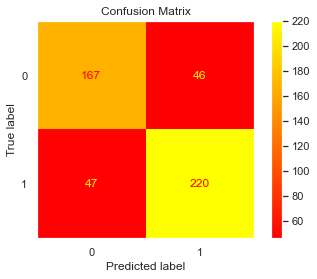

In [71]:
plot_confusion_matrix(model, x_test, y_test, cmap="autumn")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [65]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8040037980693148

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

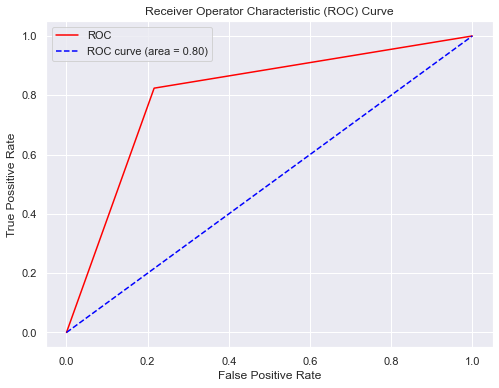

In [67]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="red", label="ROC")
plt.plot([0, 1], [ 0, 1], color='blue', linestyle="--", label="ROC curve (area = %0.2f)" %auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive Rate")
plt.title("Receiver Operator Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [68]:
model.predict(scaler.fit_transform([[8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70]]))

array([1], dtype=int64)